In [3]:
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Circle
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

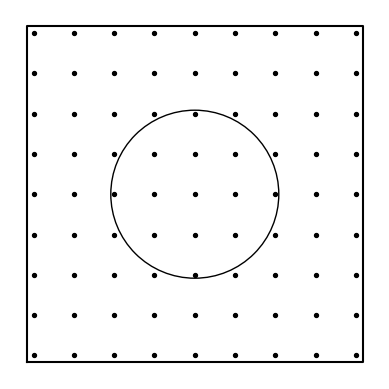

In [9]:

#Define the 2D Box, Points inside the box and the circle

def draw_square(x, y, side_length):
    x_points = [x, x + side_length, x + side_length, x, x]
    y_points = [y, y, y + side_length, y + side_length, y]
    plt.plot(x_points, y_points, color='black')

def draw_points(x, y, side_length, distance_x, distance_y):
    center_x = x + side_length / 2
    center_y = y + side_length / 2
    num_points_x = int(side_length / distance_x)
    num_points_y = int(side_length / distance_y)
    for i in range(-num_points_x//2, num_points_x//2 + 1):
        for j in range(-num_points_y//2, num_points_y//2 + 1):
            point_x = center_x + i * distance_x
            point_y = center_y + j * distance_y
            if point_x >= x and point_x <= x + side_length and point_y >= y and point_y <= y + side_length:
                plt.scatter(point_x, point_y, color='black',s=8)
                


def draw_circle(center_x, center_y, radius):
    circle = Circle((center_x, center_y), radius, fill=False, color='black')
    plt.gca().add_artist(circle)

# Draw a square with bottom-left corner at (0, 0) and side length 1
draw_square(0, 0, 1)

# Draw uniformly spaced points inside the square
distance_x = 0.12
distance_y = 0.12
draw_points(0, 0, 1, distance_x, distance_y)

# Draw a circle with center at (0.5, 0.5) and radius 0.25
draw_circle(0.5, 0.5, 0.25)

plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()

In [12]:
# creating dataframe with coordinates and the material

# Constants
start_x = 0; end_x = 1; start_y = 0; end_y = 1
center_x = 0.5; center_y = 0.5; radius = 0.25

df = pd.DataFrame(columns=["coordinates"])

# Loop through all the points
points = []
for x_coord in np.arange(start_x, end_x, distance_x):
    for y_coord in np.arange(start_y, end_y, distance_y):
        if (x_coord - center_x)**2 + (y_coord - center_y)**2 <= radius**2:
            df = df.append({'coordinates':[x_coord, y_coord,"A"]}, ignore_index=True)
        else:
            df = df.append({'coordinates':[x_coord, y_coord,"B"]}, ignore_index=True)
        points.append([x_coord, y_coord])

# print("number of coords in A: " + str(df['material'].value_counts()["A"]))
# print("number of coords in B: " + str(df['material'].value_counts()["B"]))
df

/var/folders/21/0h7wbn5d2wj_42szvv10y6j40000gn/T/ipykernel_36216/105098419.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'coordinates':[x_coord, y_coord,"B"]}, ignore_index=True)
/var/folders/21/0h7wbn5d2wj_42szvv10y6j40000gn/T/ipykernel_36216/105098419.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'coordinates':[x_coord, y_coord,"B"]}, ignore_index=True)
/var/folders/21/0h7wbn5d2wj_42szvv10y6j40000gn/T/ipykernel_36216/105098419.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'coordinates':[x_coord, y_coord,"B"]}, ignore_index=True)
/var/folders/21/0h7wbn5d2wj_42szvv10y6j40000gn/T/ipykernel_36216/105098419.py:16: FutureWarning: The frame.append method is dep

,coordinates
0,"[0.0, 0.0, B]"
1,"[0.0, 0.12, B]"
2,"[0.0, 0.24, B]"
3,"[0.0, 0.36, B]"
4,"[0.0, 0.48, B]"
...,...
76,"[0.96, 0.48, B]"
77,"[0.96, 0.6, B]"
78,"[0.96, 0.72, B]"
79,"[0.96, 0.84, B]"


In [39]:
# using logistic LogisticRegression to predict the material property

x = df["coordinates"].to_numpy()
y = df["material"].to_numpy()
classifier = LogisticRegression(random_state = 0)
classifier.fit(x, y)

p_pred = classifier.predict_proba(x)
y_pred = classifier.predict(x)
score_ = classifier.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

ValueError: setting an array element with a sequence.